In [1]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    colors = plt.cm.Set1(np.linspace(0, 1, sgd_accuracies.shape[1]))
    for i in range(0, sgd_accuracies.shape[1], 2): # 0 - 9
        # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        # print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', color=colors[i], label=f'SGD Task {i+1}')

   
    for i in range(0, bgd_accuracies.shape[1], 2):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', color=colors[i], label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD with FedAvg BGD')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [2]:

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
def calculate_forgetting(sgd_task_accuracies, bgd_task_accuracies):
    s = len(sgd_task_accuracies)

    print("sgd_avg_acc_after_last_task", round(np.mean(sgd_task_accuracies[s-1]), 2))
    print("bgd_avg_acc_after_last_task", round(np.mean(bgd_task_accuracies[s-1]), 2))

    sgd_forgetting = []
    for i in range(s-1):
        sgd_forgetting.append(sgd_task_accuracies[i][i]-sgd_task_accuracies[s-1][i])

    bgd_forgetting = []
    for i in range(s-1):
        bgd_forgetting.append(bgd_task_accuracies[i][i]-bgd_task_accuracies[s-1][i])

    return round(np.mean(sgd_forgetting),2), round(np.mean(bgd_forgetting), 2)

#### With new aggregation -- Permuted MNIST -- Tasks 5 -- Dirichlet

## **alpha = 0.1**

sgd_means: [62.4, 65.045, 71.60000000000001, 72.345, 67.086]
bgd_means: [61.22, 65.48, 66.81, 66.215, 61.35]


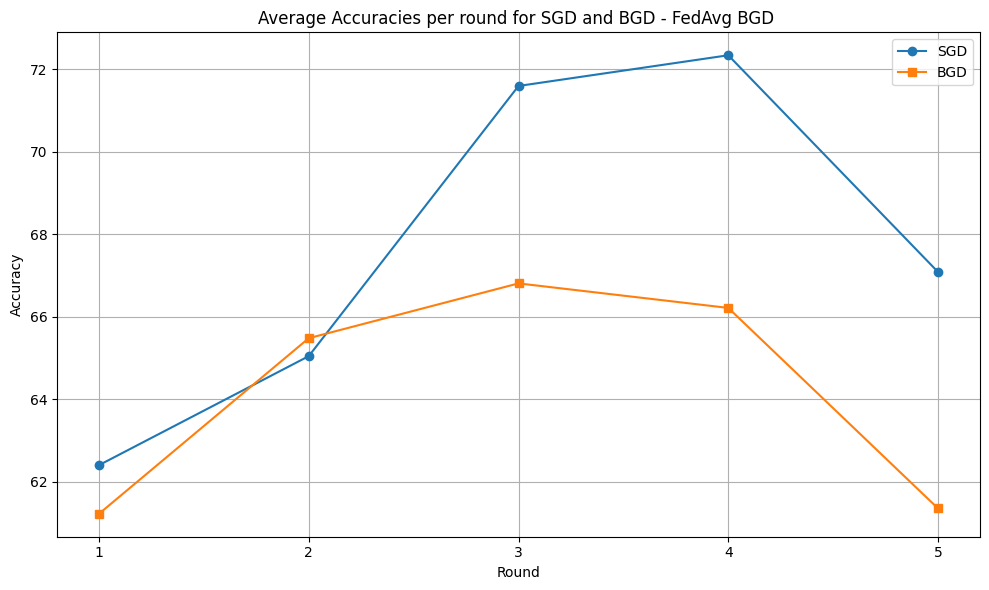

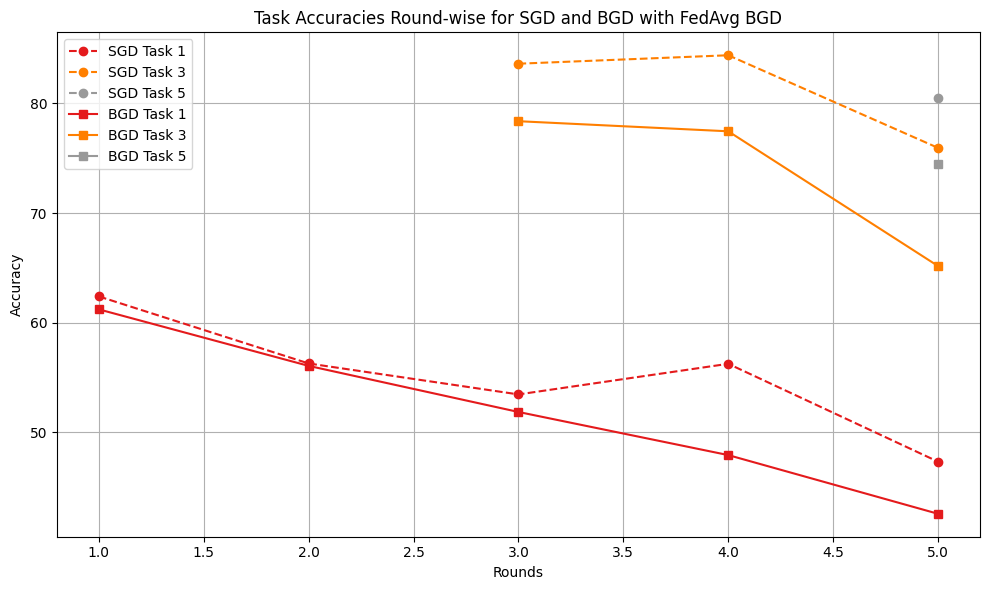

sgd_avg_acc_after_last_task 67.09
bgd_avg_acc_after_last_task 61.35


(10.79, 14.34)

In [4]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1 = {'bgd' : [[61.22], [56.07, 74.89], [51.87, 70.19, 78.37], [47.94, 64.35, 77.45, 75.12], [42.59, 58.49, 65.17, 66.0, 74.5]],
                               'sgd' : [[62.4], [56.29, 73.8], [53.47, 77.72, 83.61], [56.26, 70.43, 84.38, 78.31], [47.34, 57.75, 75.94, 73.92, 80.48]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  


## **alpha = 0.01**

sgd_means: [32.89, 42.92, 45.473333333333336, 36.96, 38.394]
bgd_means: [30.62, 37.85, 34.86666666666667, 32.65, 31.588]


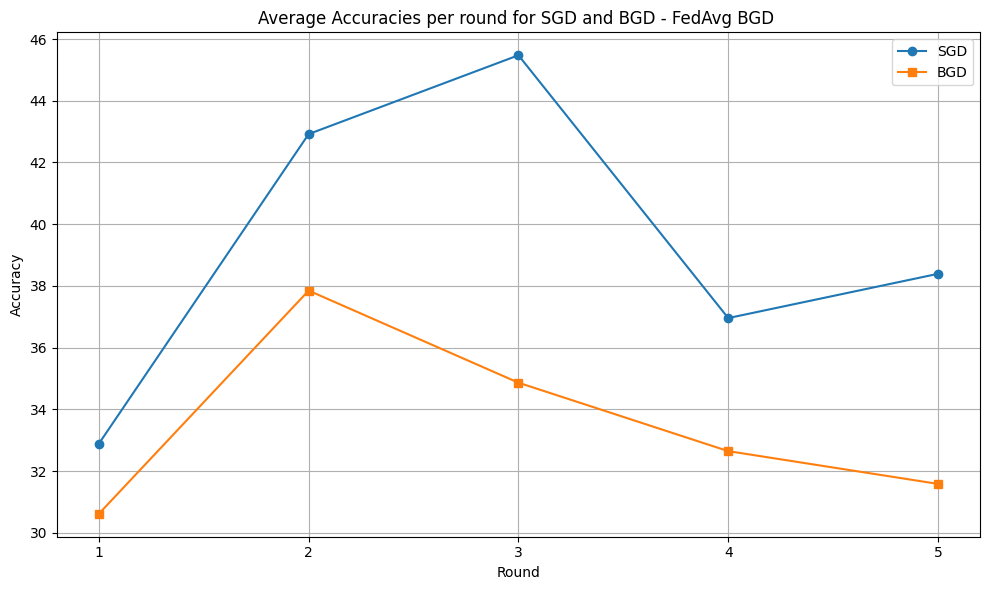

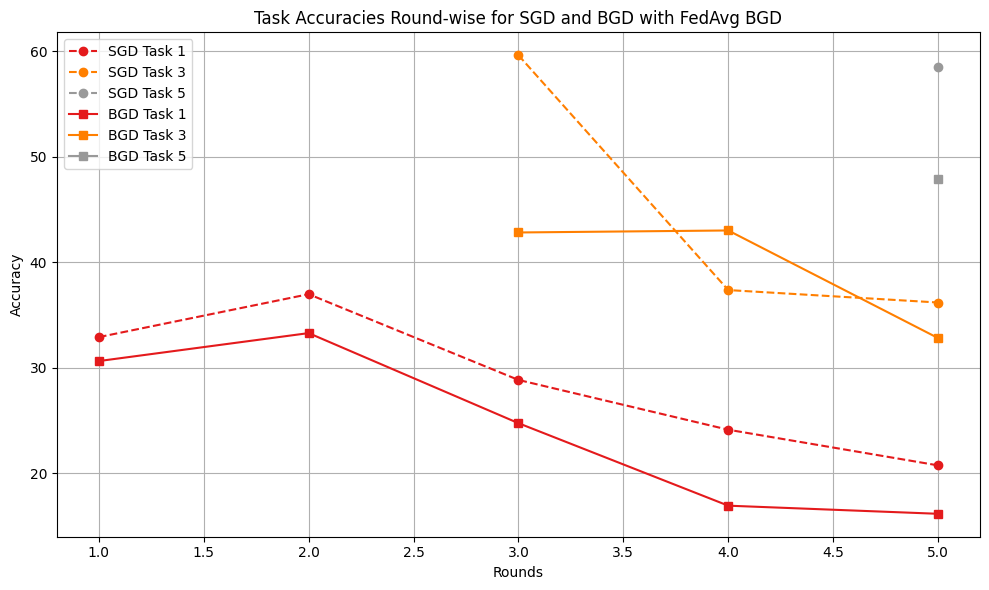

sgd_avg_acc_after_last_task 38.39
bgd_avg_acc_after_last_task 31.59


(12.63, 11.89)

In [5]:
#### Non-IID || Rounds-5 || Tasks-5
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01 = {'bgd' : [[30.62], [33.27, 42.43], [24.73, 37.06, 42.81], [16.91, 28.93, 43.0, 41.76], [16.14, 26.31, 32.8, 34.82, 47.87]],
                                               'sgd' : [[32.89], [36.96, 48.88], [28.83, 47.98, 59.61], [24.11, 43.72, 37.35, 42.66], [20.73, 33.65, 36.17, 42.95, 58.47]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_01['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  
   

## **alpha = 1**

sgd_means: [91.69, 91.16, 87.24333333333334, 81.2025, 78.142]
bgd_means: [92.41, 90.08500000000001, 87.53000000000002, 83.345, 81.242]


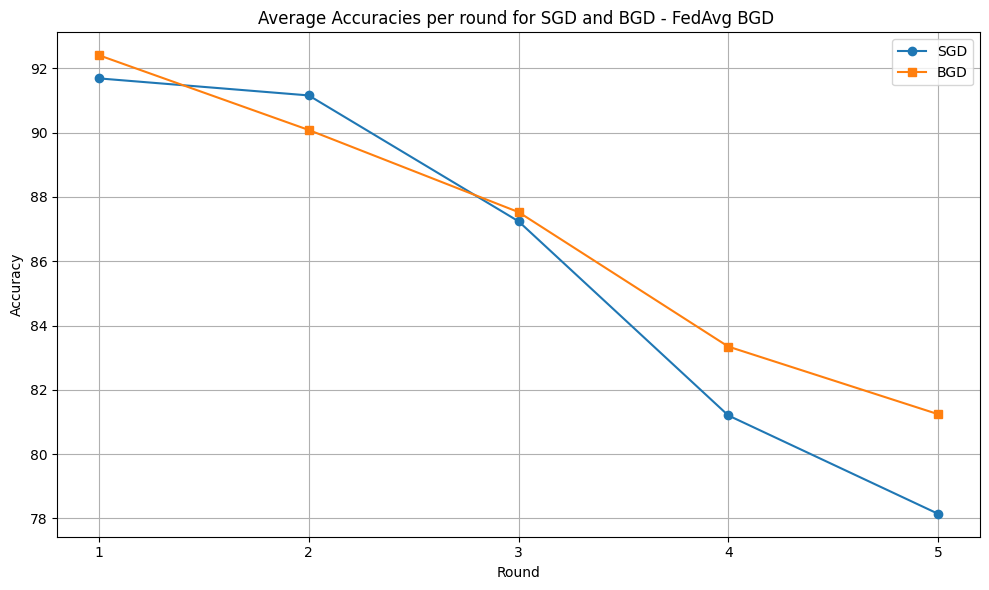

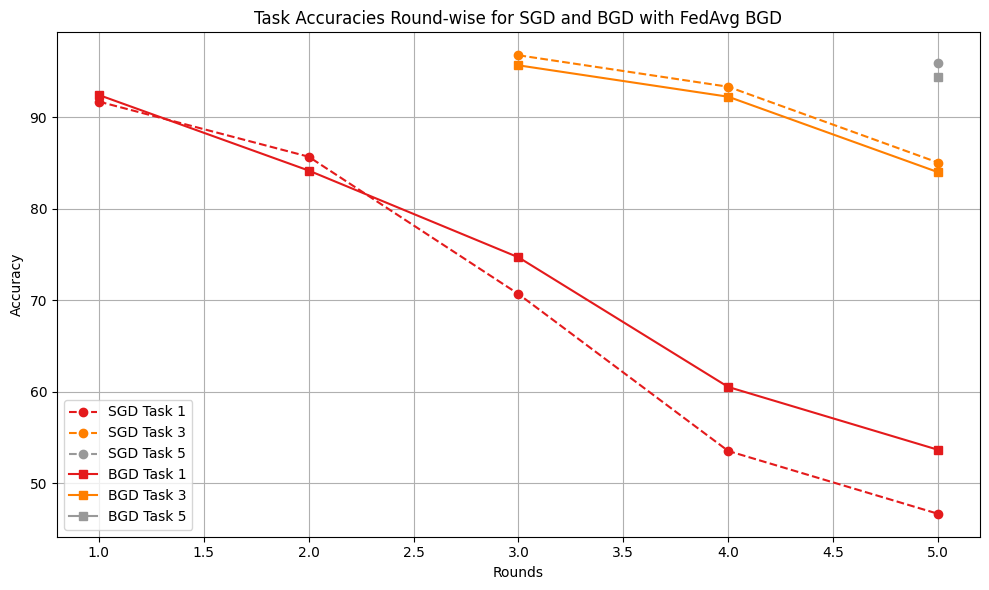

sgd_avg_acc_after_last_task 78.14
bgd_avg_acc_after_last_task 81.24


(21.65, 16.9)

In [7]:
#### Non-IID || Rounds-5 || Tasks-5
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1 = {'bgd' : [[92.41], [84.16, 96.01], [74.68, 92.26, 95.65], [60.52, 85.33, 92.22, 95.31], [53.66, 80.04, 83.98, 94.12, 94.41]],
                                               'sgd' : [[91.69], [85.67, 96.65], [70.67, 94.31, 96.75], [53.53, 81.63, 93.31, 96.34], [46.67, 67.41, 85.03, 95.71, 95.89]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  
   

## Split MNIST **alpha = 1** (To check)

sgd_means: [99.622, 86.6455, 86.78433333333334, 60.62825, 63.44019999999999]
bgd_means: [99.669, 87.382, 86.46533333333333, 64.15725, 69.404]


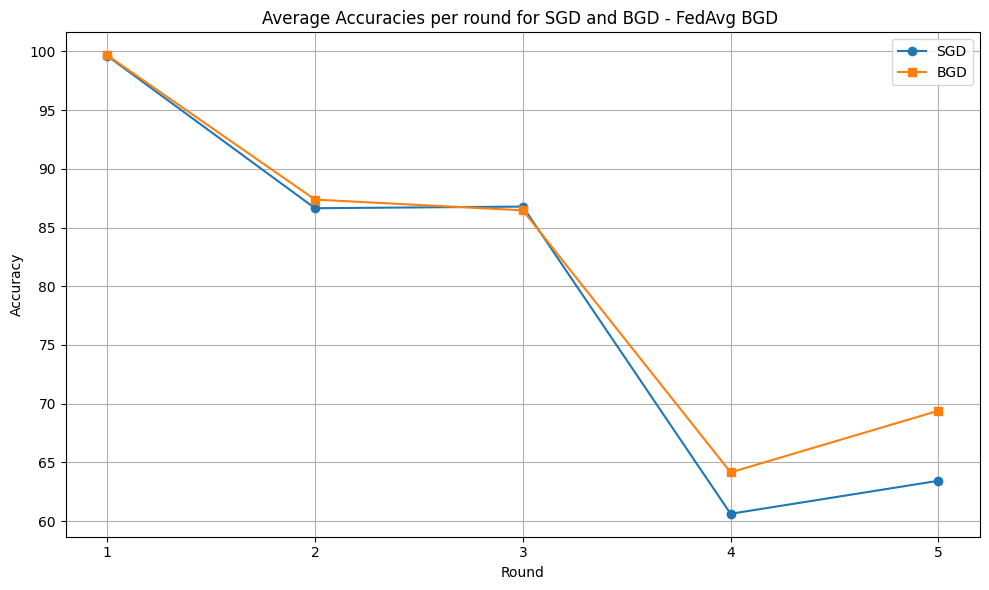

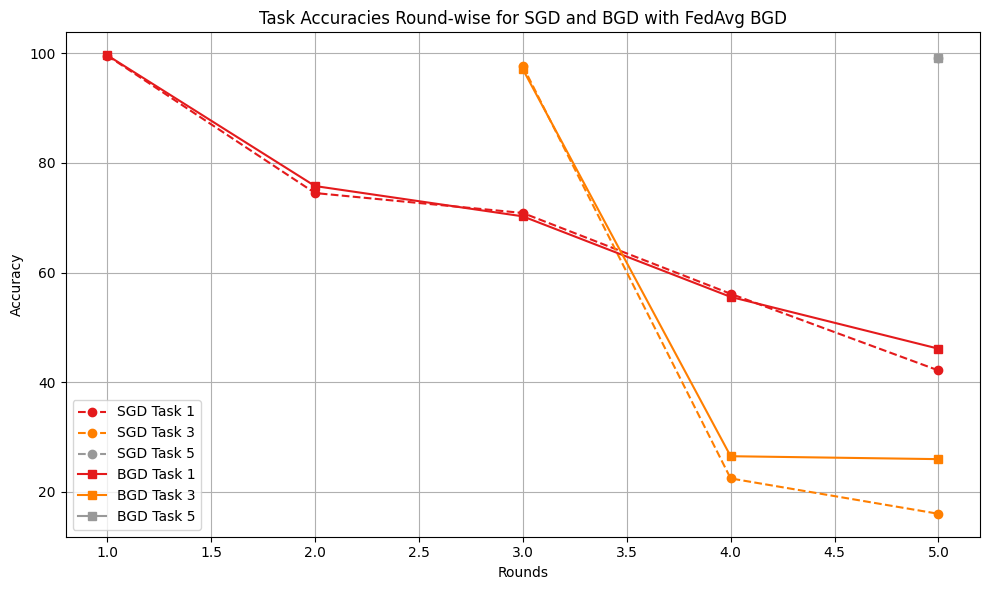

sgd_avg_acc_after_last_task 63.44
bgd_avg_acc_after_last_task 69.4


(44.25, 36.76)

In [5]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1 = {'bgd' : [[99.669], [75.792, 98.972], [70.26, 92.018, 97.118], [55.556, 75.563, 26.467, 99.043], [46.099, 78.11, 25.934, 97.633, 99.244]],
                                               'sgd' :  [[99.622], [74.515, 98.776], [70.875, 91.773, 97.705], [56.123, 64.985, 22.412, 98.993], [42.128, 62.292, 15.955, 97.734, 99.092]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_1['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  
   

## **alpha = 0.5**

sgd_means: [87.01, 87.85, 83.17666666666666, 74.8475, 71.74600000000001]
bgd_means: [89.97, 86.205, 82.71333333333332, 78.4575, 78.928]


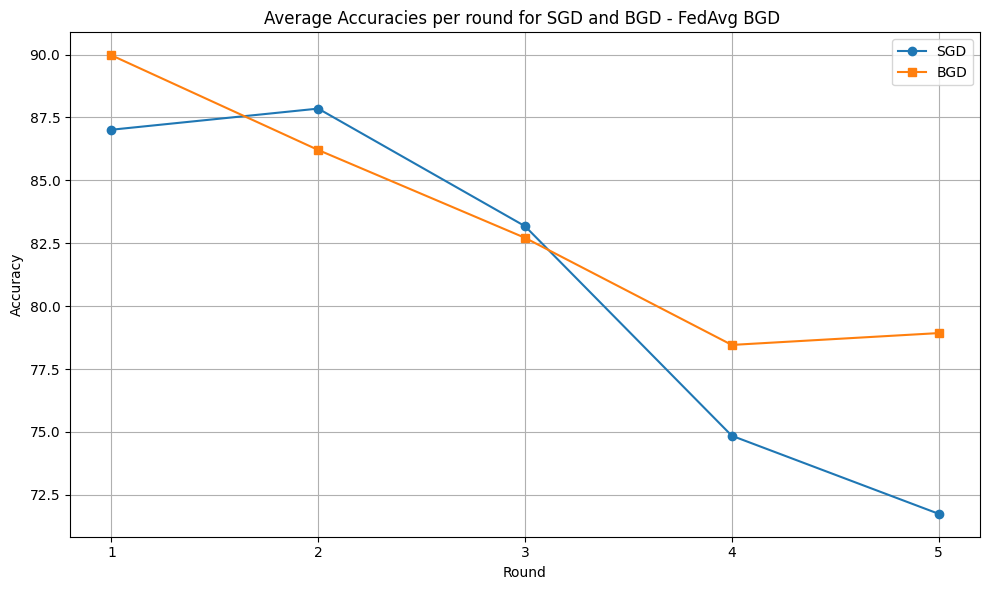

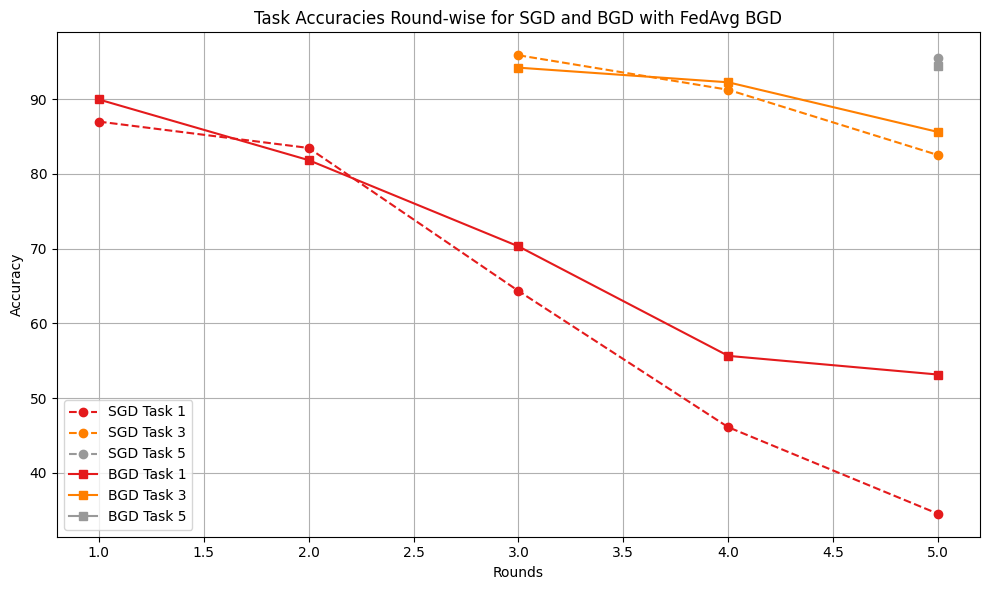

sgd_avg_acc_after_last_task 71.75
bgd_avg_acc_after_last_task 78.93


(26.34, 16.4)

In [5]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5 = {'bgd' : [[89.97], [81.85, 90.56], [70.31, 83.6, 94.23], [55.65, 74.96, 92.27, 90.95], [53.15, 72.02, 85.62, 89.34, 94.51]],
                                               'sgd' :  [[87.01], [83.48, 92.22], [64.34, 89.3, 95.89], [46.1, 68.63, 91.27, 93.39], [34.51, 53.68, 82.53, 92.42, 95.59]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_5['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **alpha = 0.4**

sgd_means: [81.45, 82.785, 81.50666666666666, 75.6925, 71.81199999999998]
bgd_means: [83.51, 82.565, 79.75666666666666, 76.5875, 77.24600000000001]


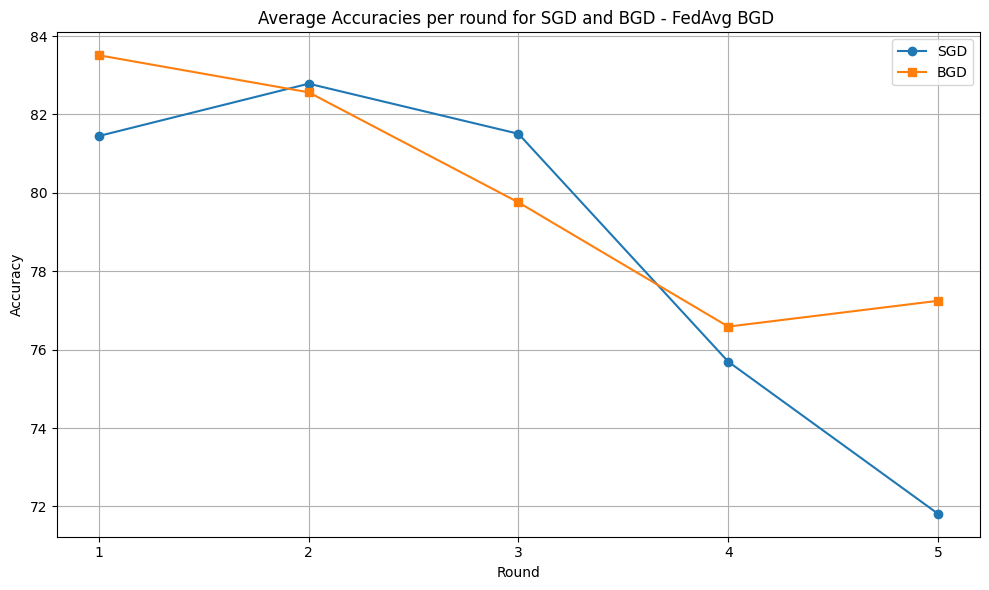

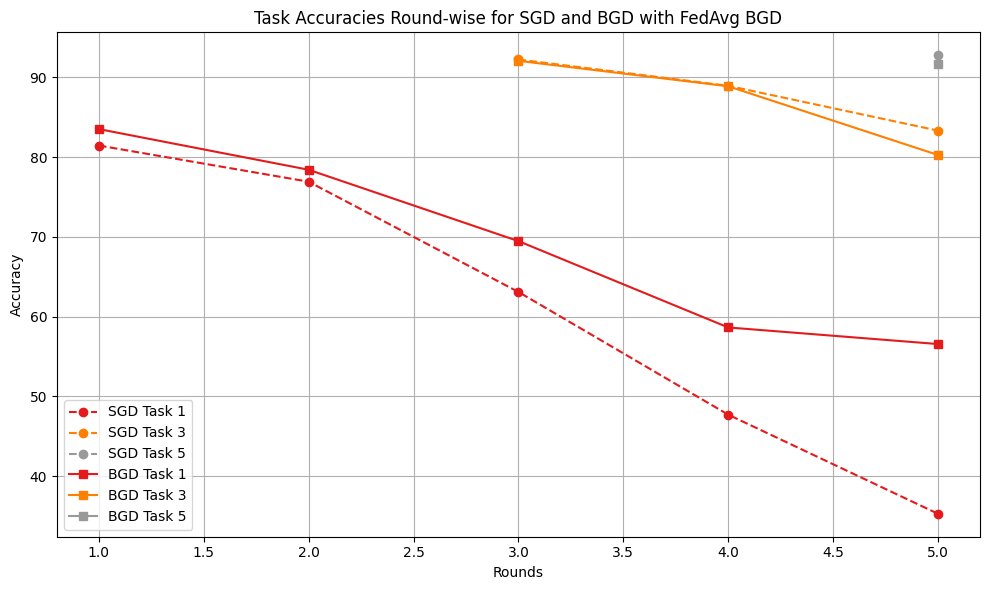

sgd_avg_acc_after_last_task 71.81
bgd_avg_acc_after_last_task 77.25


(21.75, 14.09)

In [10]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4 = {'bgd' : [[83.51], [78.41, 86.72], [69.46, 77.74, 92.07], [58.63, 70.23, 88.88, 88.61], [56.55, 70.87, 80.26, 86.88, 91.67]],
                                               'sgd' :  [[81.45], [76.91, 88.66], [63.08, 89.2, 92.24], [47.69, 75.2, 88.94, 90.94], [35.26, 59.28, 83.32, 88.43, 92.77]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_4['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **alpha = 0.3**

sgd_means: [80.86, 79.97, 77.67333333333333, 71.3225, 68.16600000000001]
bgd_means: [86.99, 81.21000000000001, 75.71, 74.035, 72.64200000000001]


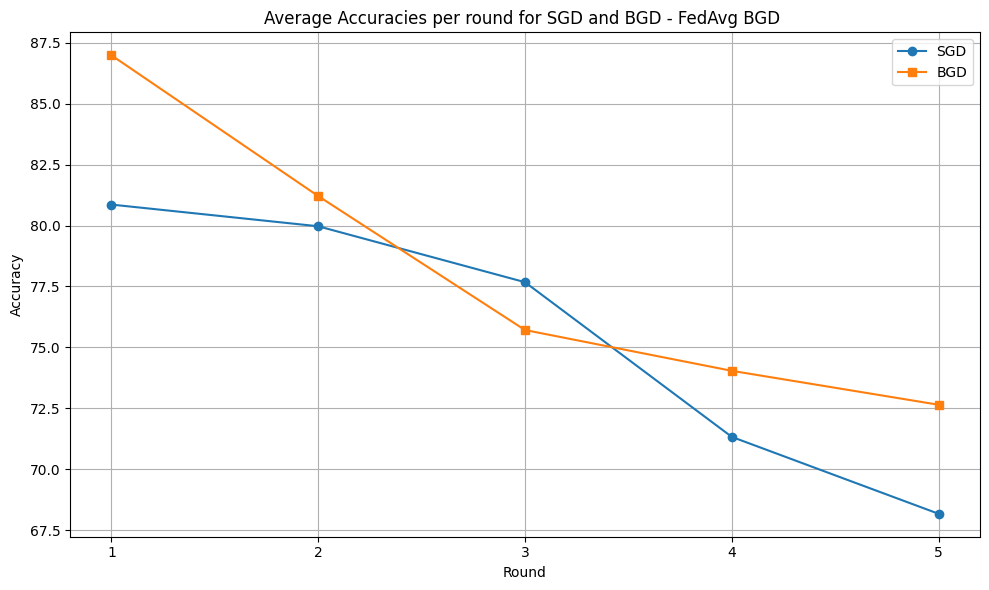

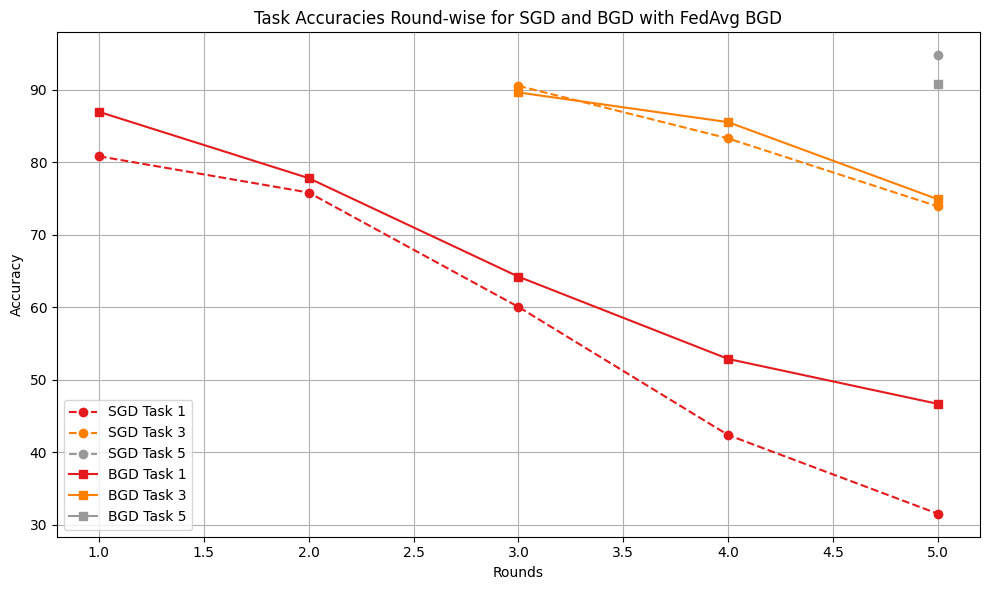

sgd_avg_acc_after_last_task 68.17
bgd_avg_acc_after_last_task 72.64


(25.19, 18.9)

In [9]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3 = {'bgd' : [[86.99], [77.84, 84.58], [64.24, 73.23, 89.66], [52.89, 70.93, 85.56, 86.76], [46.69, 65.39, 74.91, 85.42, 90.8]],
                                               'sgd' :  [[80.86], [75.85, 84.09], [60.07, 82.38, 90.57], [42.39, 68.29, 83.31, 91.3], [31.53, 51.25, 73.93, 89.33, 94.79]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_3['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **alpha = 0.2**

sgd_means: [77.21, 75.25999999999999, 70.62333333333333, 68.0675, 68.396]
bgd_means: [76.09, 75.58, 71.0, 67.4575, 69.28799999999998]


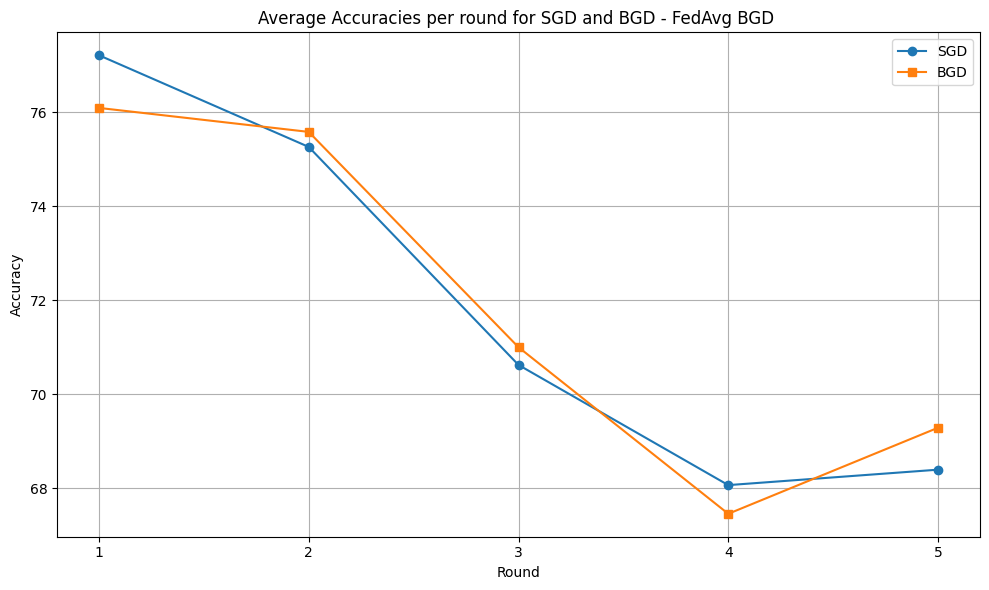

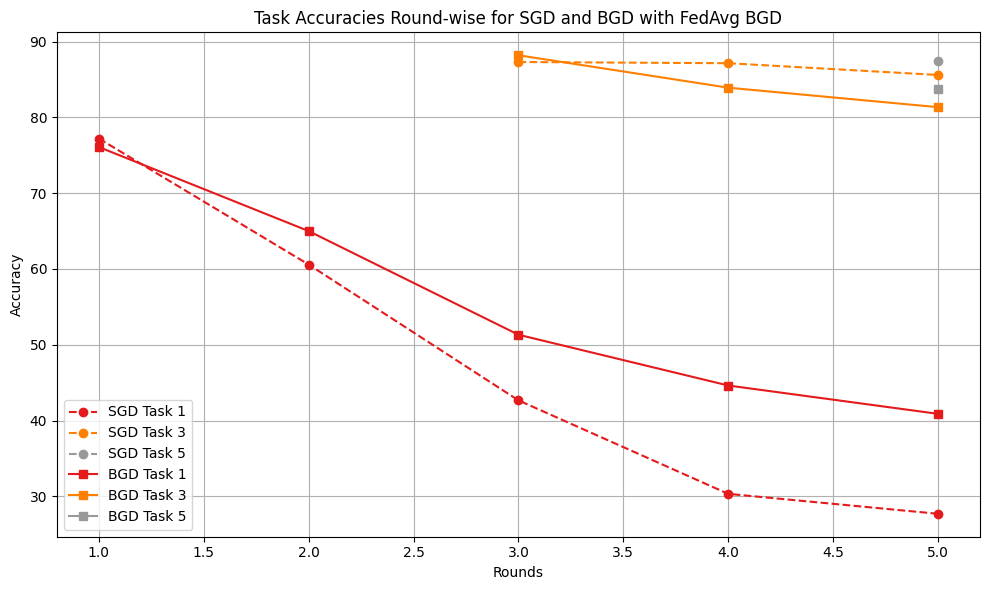

sgd_avg_acc_after_last_task 68.4
bgd_avg_acc_after_last_task 69.29


(21.57, 17.18)

In [8]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2 = {'bgd' : [[76.09], [65.0, 86.16], [51.32, 73.48, 88.2], [44.62, 60.33, 83.92, 80.96], [40.88, 60.0, 81.35, 80.44, 83.77]],
                                               'sgd' :  [[77.21], [60.58, 89.94], [42.66, 81.9, 87.31], [30.32, 68.44, 87.15, 86.36], [27.69, 54.01, 85.6, 87.25, 87.43]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_0_2['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **alpha = 100000**

sgd_means: [96.32, 94.75, 90.79333333333334, 79.815, 76.054]
bgd_means: [96.25, 93.58, 90.94666666666666, 84.5625, 82.316]


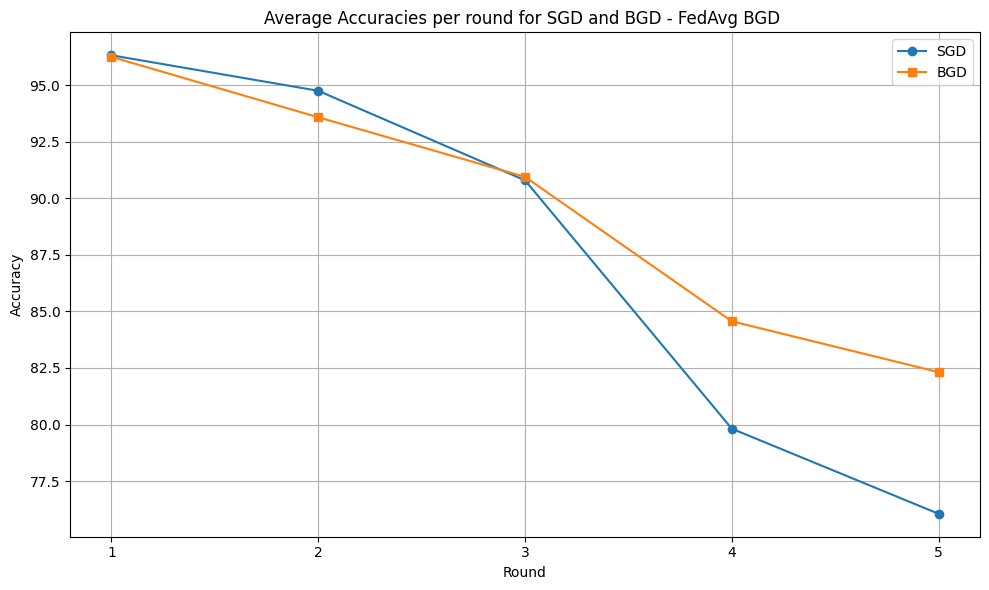

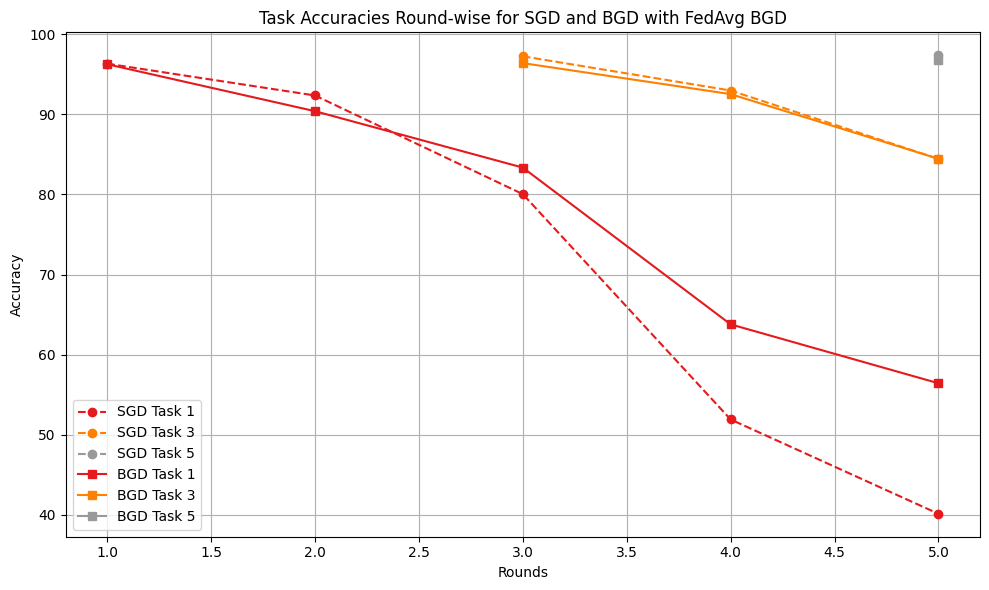

sgd_avg_acc_after_last_task 76.05
bgd_avg_acc_after_last_task 82.32


(26.28, 17.82)

In [11]:
new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000 = {'bgd' : [[96.25], [90.39, 96.77], [83.35, 93.1, 96.39], [63.79, 85.22, 92.52, 96.72], [56.44, 78.66, 84.45, 95.29, 96.74]],
                                                       'sgd' :  [[96.32], [92.35, 97.15], [80.04, 95.1, 97.24], [51.92, 77.07, 92.97, 97.3], [40.15, 61.68, 84.44, 96.63, 97.37]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_perm_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

## **alpha = 0.4 [Split MNIST]**

sgd_means: [98.061, 84.1425, 87.41833333333334, 61.3605, 63.665000000000006]
bgd_means: [99.527, 88.115, 87.35466666666667, 62.41825, 69.65540000000001]


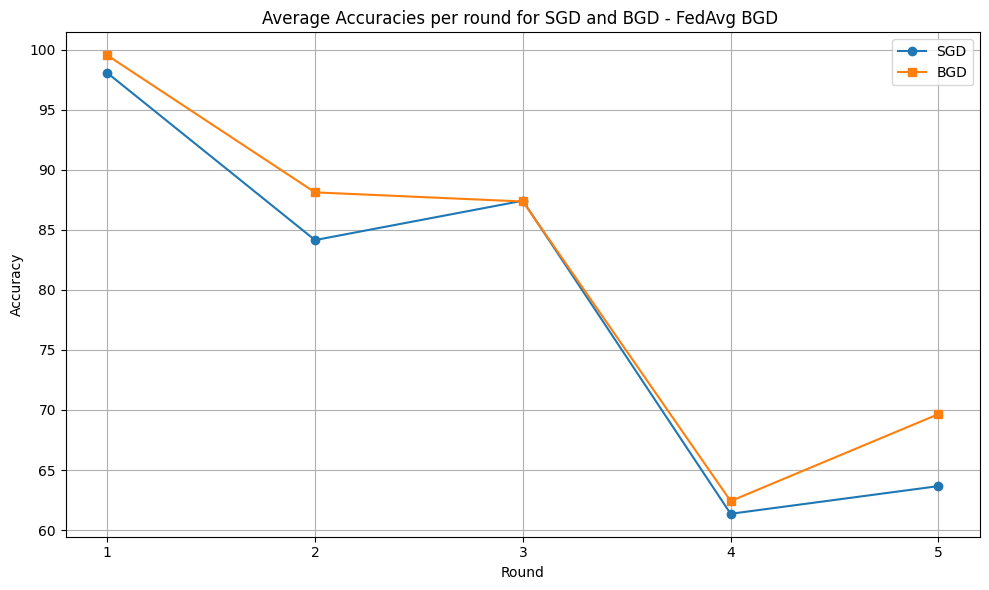

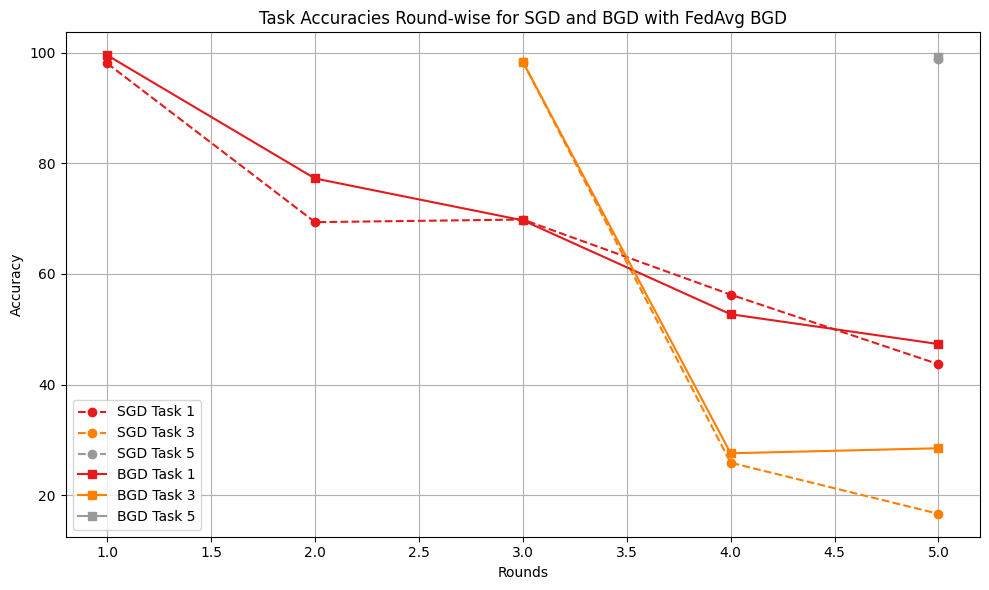

sgd_avg_acc_after_last_task 63.67
bgd_avg_acc_after_last_task 69.66


(43.77, 36.71)

In [12]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4 = {'bgd' : [[99.527], [77.258, 98.972], [69.693, 94.025, 98.346], [52.719, 70.323, 27.588, 99.043], [47.329, 75.122, 28.495, 98.087, 99.244]],
                                               'sgd' : [[98.061], [69.362, 98.923], [69.835, 94.074, 98.346], [56.265, 64.153, 25.88, 99.144], [43.688, 61.263, 16.649, 97.784, 98.941]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_0_4['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting

## **alpha = 100000 [Split MNIST]**

sgd_means: [99.527, 88.137, 86.74333333333334, 60.5215, 63.48819999999999]
bgd_means: [99.669, 89.137, 85.72366666666666, 65.209, 69.78420000000001]


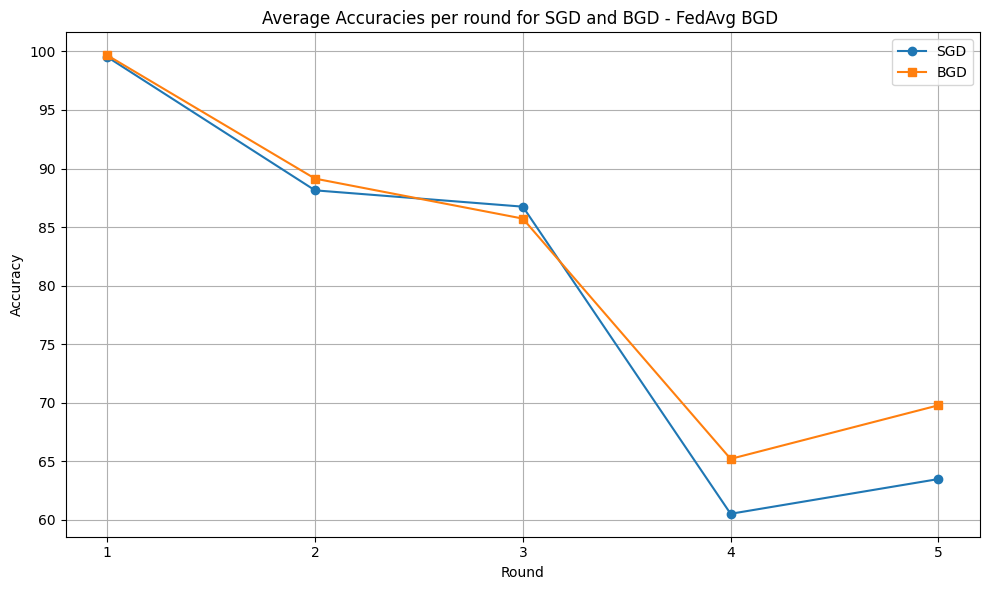

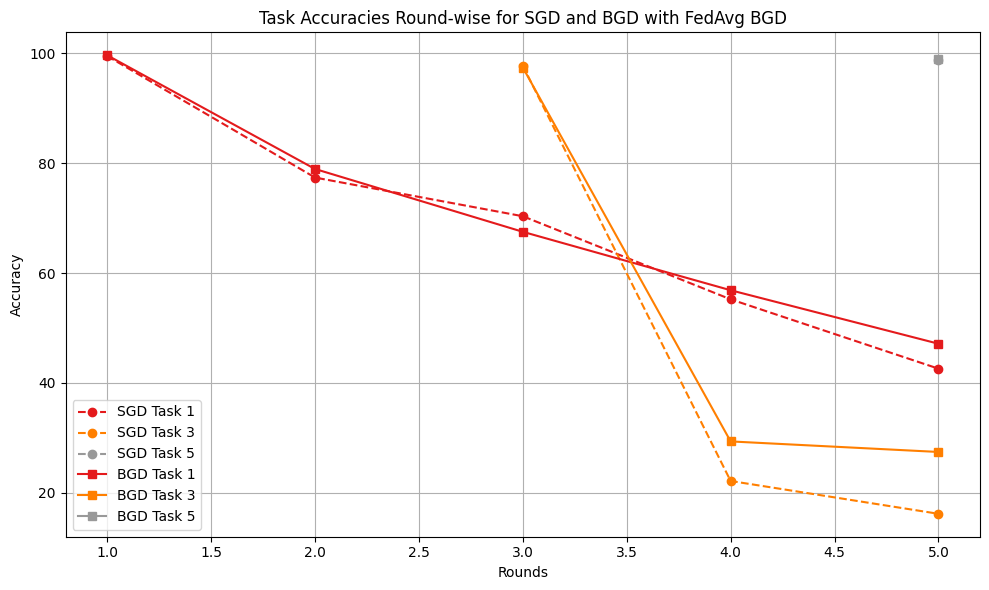

sgd_avg_acc_after_last_task 63.49
bgd_avg_acc_after_last_task 69.78


(44.18, 36.38)

In [13]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000 = {'bgd' : [[99.669], [78.96, 99.314], [67.518, 92.214, 97.439], [56.879, 75.514, 29.349, 99.094], [47.139, 77.326, 27.428, 98.087, 98.941]],
                                               'sgd' : [[99.527], [77.4, 98.874], [70.355, 92.116, 97.759], [55.225, 65.622, 22.145, 99.094], [42.6, 62.047, 16.169, 97.734, 98.891]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting